In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

/home/alexander/Documents/Programming/photo_enhancement/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

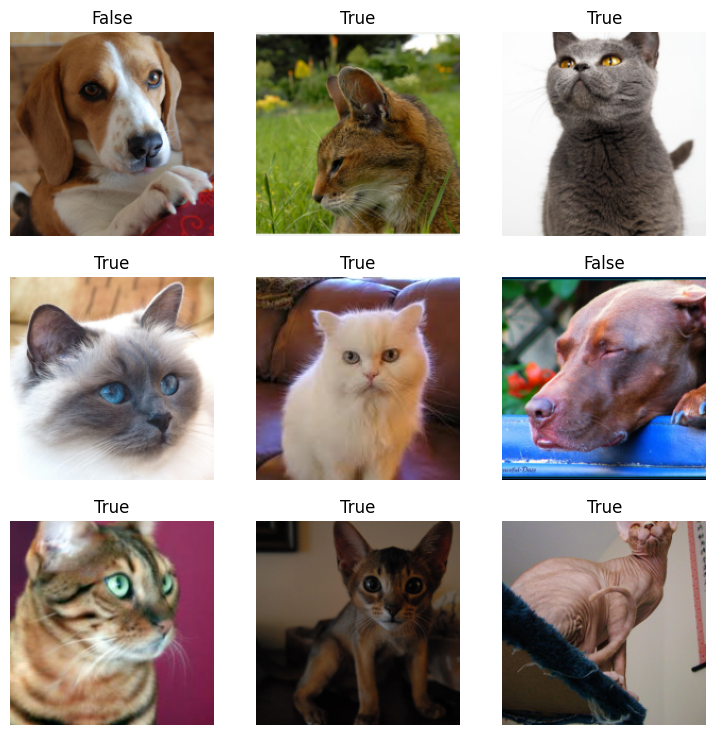

In [7]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/alexander/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 44.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.202679,0.053286,0.019621,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.081549,0.059668,0.017591,00:06
1,0.046306,0.019657,0.007442,00:06
2,0.020108,0.017160,0.005413,00:06


### Export learner in file

In [6]:
learn.export('model.pkl')

### Export to huggingface

In [8]:
from huggingface_hub import push_to_hub_fastai

repo_id = "asFrants/photo_enhancement"
push_to_hub_fastai(learner=learn, repo_id=repo_id)

model.pkl: 100%|██████████| 47.0M/47.0M [00:05<00:00, 8.23MB/s]


'https://huggingface.co/asFrants/photo_enhancement/tree/main/'

In [10]:
from huggingface_hub import from_pretrained_fastai

repo_id = "asFrants/photo_enhancement"
learn = from_pretrained_fastai(repo_id)

Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 82646.38it/s]
